In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
# loading the dataset into pandas dataframe
data = pd.read_csv("online payment data.csv")
data

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.00,160296.36,M1979787155,0.00,0.00,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.00,19384.72,M2044282225,0.00,0.00,0,0
2,1,TRANSFER,181.00,C1305486145,181.00,0.00,C553264065,0.00,0.00,1,0
3,1,CASH_OUT,181.00,C840083671,181.00,0.00,C38997010,21182.00,0.00,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.00,29885.86,M1230701703,0.00,0.00,0,0
...,...,...,...,...,...,...,...,...,...,...,...
6362615,743,CASH_OUT,339682.13,C786484425,339682.13,0.00,C776919290,0.00,339682.13,1,0
6362616,743,TRANSFER,6311409.28,C1529008245,6311409.28,0.00,C1881841831,0.00,0.00,1,0
6362617,743,CASH_OUT,6311409.28,C1162922333,6311409.28,0.00,C1365125890,68488.84,6379898.11,1,0
6362618,743,TRANSFER,850002.52,C1685995037,850002.52,0.00,C2080388513,0.00,0.00,1,0


In [3]:
# Getting familiar with the data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [4]:
data.describe()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06,6.362620e+06
mean,2.433972e+02,1.798619e+05,8.338831e+05,8.551137e+05,1.100702e+06,1.224996e+06,1.290820e-03,2.514687e-06
std,1.423320e+02,6.038582e+05,2.888243e+06,2.924049e+06,3.399180e+06,3.674129e+06,3.590480e-02,1.585775e-03
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.560000e+02,1.338957e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2.390000e+02,7.487194e+04,1.420800e+04,0.000000e+00,1.327057e+05,2.146614e+05,0.000000e+00,0.000000e+00
75%,3.350000e+02,2.087215e+05,1.073152e+05,1.442584e+05,9.430367e+05,1.111909e+06,0.000000e+00,0.000000e+00
max,7.430000e+02,9.244552e+07,5.958504e+07,4.958504e+07,3.560159e+08,3.561793e+08,1.000000e+00,1.000000e+00


In [5]:
# checking any null values in the data
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
# type of variables present in teh data
obj = (data.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (data.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (data.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))


Categorical variables: 3
Integer variables: 0
Float variables: 5


<Axes: xlabel='type', ylabel='count'>

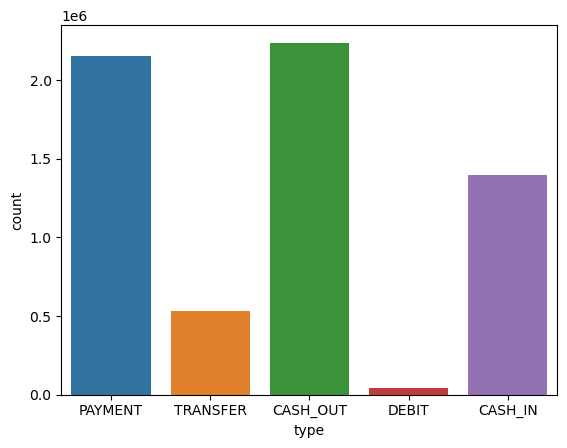

In [7]:
sns.countplot(x='type', data=data)


<Axes: xlabel='type', ylabel='amount'>

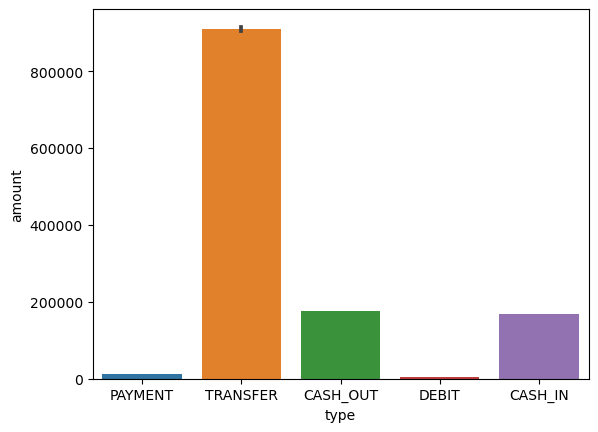

In [8]:
sns.barplot(x='type', y='amount', data=data)


In [9]:
# checking the count of fraud of payments
data['isFraud'].value_counts()


0    6354407
1       8213
Name: isFraud, dtype: int64

In [10]:
# Separate the two kinds of data (sampling)
kind1_data = data[data['isFraud'] == 0]
kind2_data = data[data['isFraud'] == 1]

# Sample a specific number of rows from each kind
sample_size = 8000  # Adjust as needed
sampled_kind1 = kind1_data.sample(n=sample_size, random_state=42)
sampled_kind2 = kind2_data.sample(n=sample_size, random_state=42)

# Concatenate the sampled data back together if needed
data = pd.concat([sampled_kind1, sampled_kind2], ignore_index=True)

In [11]:
data['isFraud'].value_counts()

0    8000
1    8000
Name: isFraud, dtype: int64

<Axes: xlabel='step', ylabel='Density'>

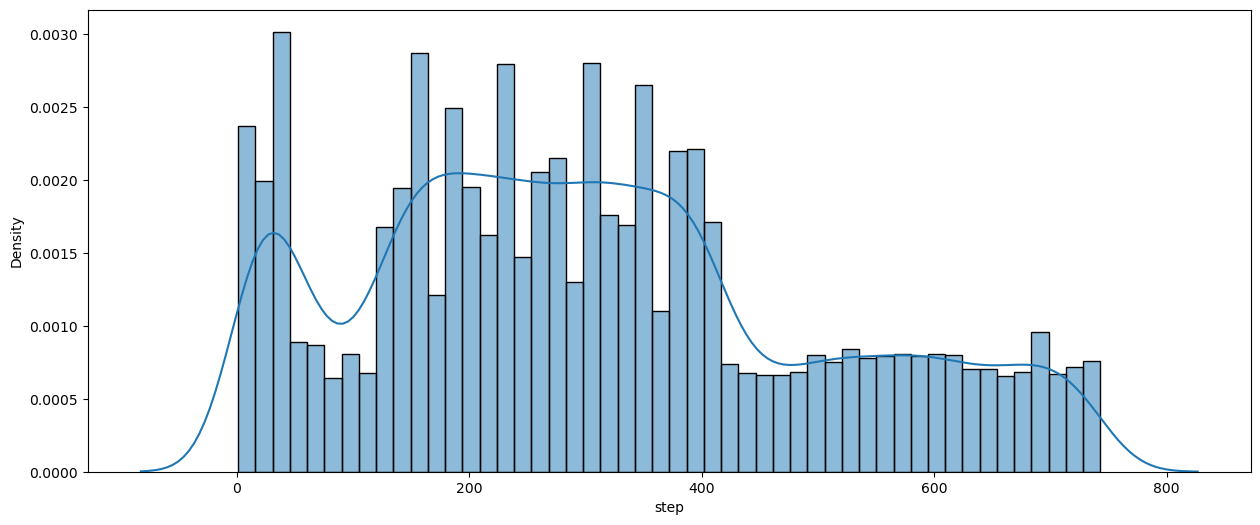

In [12]:
plt.figure(figsize=(15, 6))
sns.histplot(data['step'], bins=50,kde= True,stat="density", kde_kws=dict(cut=3))


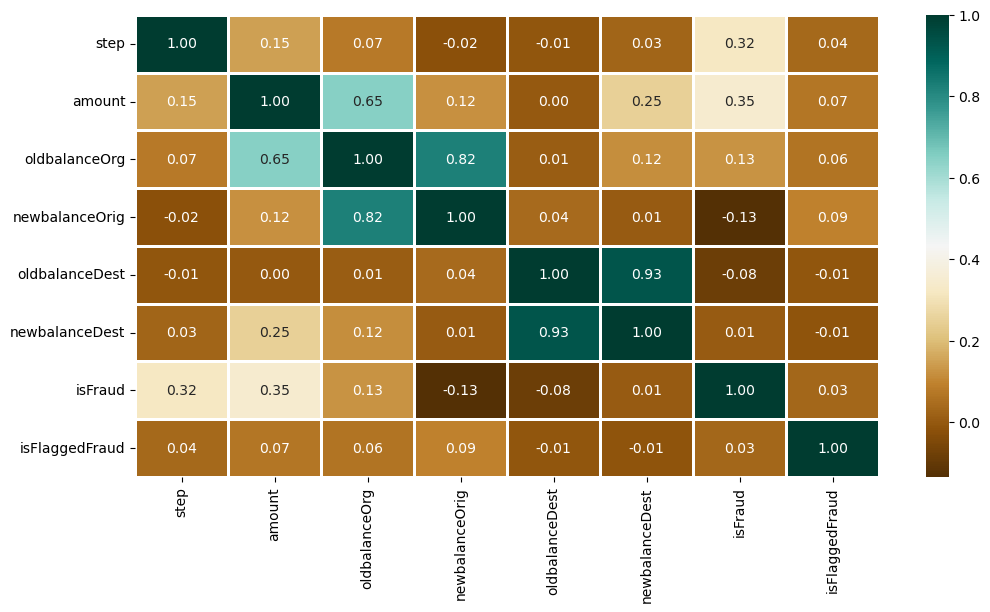

In [13]:
# Exclude non-numeric columns from the correlation matrix calculation
numeric_columns = data.select_dtypes(include=['int64', 'float64']).columns
data_numeric = data[numeric_columns]

# Calculate correlation matrix
corr_matrix = data_numeric.corr()

# Set up the figure and heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(corr_matrix,
            cmap='BrBG',
            fmt='.2f',
            linewidths=2,
            annot=True)

plt.show()

In [14]:
type_new = pd.get_dummies(data['type'], drop_first=True)
data_new = pd.concat([data, type_new], axis=1)
data_new.head()


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,CASH_OUT,DEBIT,PAYMENT,TRANSFER
0,162,CASH_OUT,183806.32,C691771226,19391.00,0.00,C1416312719,382572.19,566378.51,0,0,1,0,0,0
1,137,PAYMENT,521.37,C203378011,0.00,0.00,M42773300,0.00,0.00,0,0,0,0,1,0
2,179,PAYMENT,3478.18,C1698571270,19853.00,16374.82,M643984524,0.00,0.00,0,0,0,0,1,0
3,355,PAYMENT,1716.05,C913764937,5769.17,4053.13,M1387429131,0.00,0.00,0,0,0,0,1,0
4,354,CASH_IN,253129.93,C2017736577,1328499.49,1581629.42,C407484102,2713220.48,2460090.55,0,0,0,0,0,0


In [15]:
X = data_new.drop(['isFraud', 'type', 'nameOrig', 'nameDest'], axis=1)
y = data_new['isFraud']
X.shape, y.shape


((16000, 11), (16000,))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [17]:
# Fitting different models
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score as ras

def get_model_name(model):
    if isinstance(model, XGBClassifier):
        return 'XGBClassifier()'
    else:
        return repr(model)

models = [LogisticRegression(), XGBClassifier()]

for model in models:
    model.fit(X_train, y_train)
    model_name = get_model_name(model)
    
    print(f'{model_name} :')
    
    train_preds = model.predict_proba(X_train)[:, 1]
    print('Training Accuracy:', ras(y_train, train_preds))
    
    y_preds = model.predict_proba(X_test)[:, 1]
    print('Validation Accuracy:', ras(y_test, y_preds))
    print()


LogisticRegression() :
Training Accuracy: 0.9592226443896935
Validation Accuracy: 0.9626818795469887

XGBClassifier() :
Training Accuracy: 0.9999999999999999
Validation Accuracy: 0.9995746421438314



In [18]:
# XGBClassifier model got highest accuracy

classifier = XGBClassifier()
classifier.fit(X_train, y_train)
y_predict = classifier.predict(X_test)
Results = pd.DataFrame({'Actual':y_test,'Predicted':y_predict})
Results.head(10)

,Actual,Predicted
8756,1,1
4660,0,0
6095,0,0
304,0,0
8241,1,1
9577,1,1
1035,0,0
9976,1,1
7872,0,0
8341,1,1


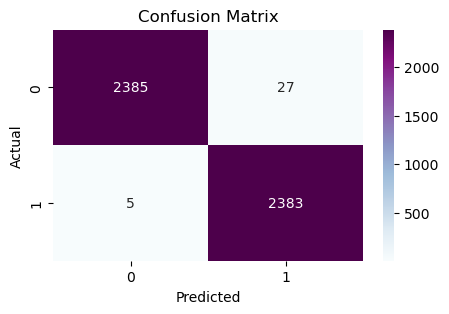

In [19]:
# Confusion matrix for XGBClassifier model

from sklearn.metrics import confusion_matrix


model = models[1]  

y_pred = model.predict(X_test)

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix using Seaborn
plt.figure(figsize=(5, 3))
sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu', cbar=True)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
